# 집값 예측 경진대회 EDA
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/train.csv', index_col = 'id')
df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


## Null data 및 데이터 타입 분석

In [3]:
print(len(df))
df.info()

1350
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.2+ KB


분석
- NUll 값 없음
  - 전처리 X
- 카테고리형 데이터 : Exter Qual, KitchenQual, Bsmt Qual
- 수치형 데이터
  - 'Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', '1st Flr SF','Full Bath', 
  - 'Year Built', 'Year Remod/Add' , 'Garage Yr Blt' 

In [4]:
feature_int = ['Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', 
                '1st Flr SF','Full Bath', 'Year Built', 'Year Remod/Add','Garage Yr Blt']
feature_category = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

## 카테고리형 데이터 처리

In [5]:
# ExterQual : 외관 재료 품질
df['Exter Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Exter Qual', ylabel='target'>

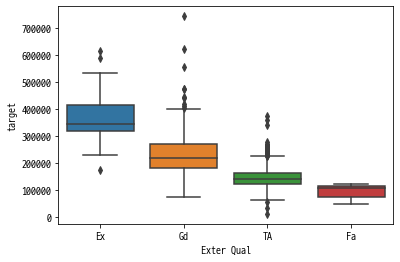

In [6]:
sns.boxplot(x = df['Exter Qual'], y = df['target'])

In [7]:
# KitchenQual : 부억 품질 
df['Kitchen Qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

<AxesSubplot:xlabel='Kitchen Qual', ylabel='target'>

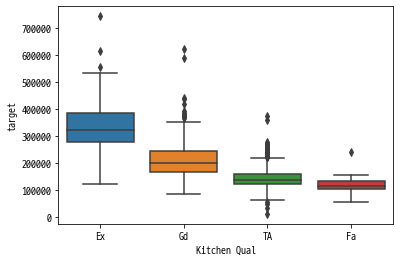

In [8]:
sns.boxplot(x = df['Kitchen Qual'], y = df['target'])

In [9]:
# BsmtQual : 지하실 높이
df['Bsmt Qual'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

<AxesSubplot:xlabel='Bsmt Qual', ylabel='target'>

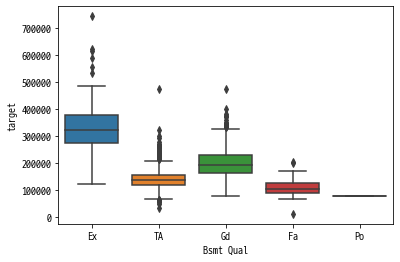

In [10]:
sns.boxplot(x = df['Bsmt Qual'], y = df['target'])

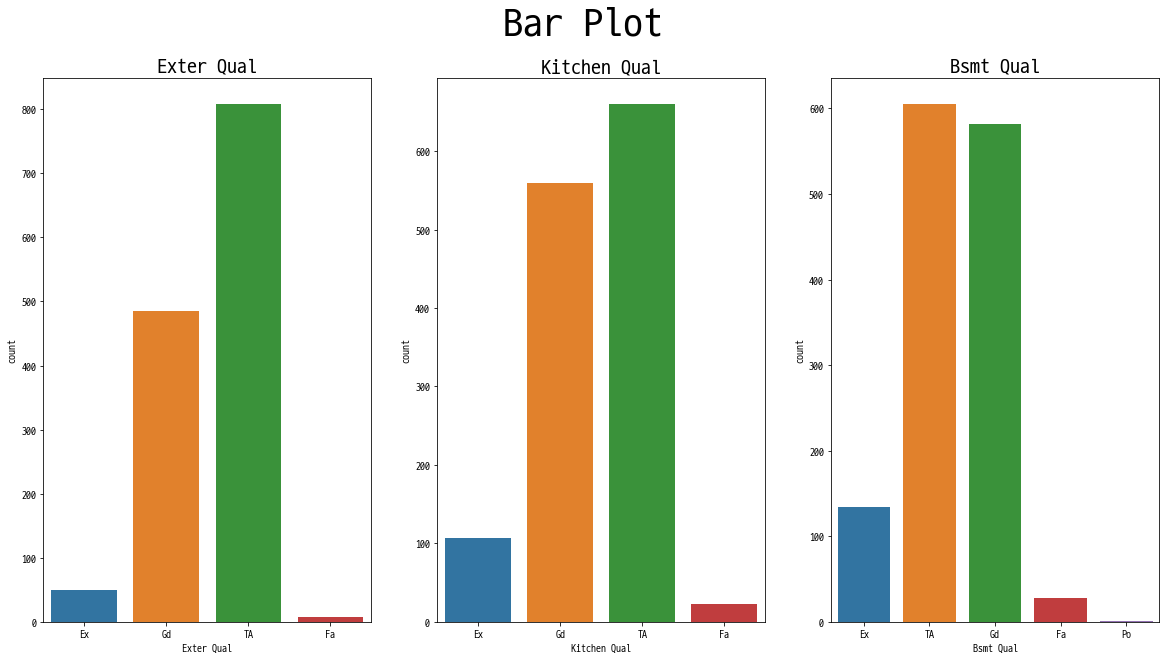

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for idx, t in enumerate(feature_category, 1):
    ax = plt.subplot(1, 3, idx)
    plt.title(t, fontsize=20)
    sns.countplot(x = df[t], ax = ax)
plt.show()

분석
- TA, GD에 데이터가 편중되어 있음

## 수치형 데이터

In [12]:
df[['Overall Qual', 'target']].corr().iloc[0,1].round(2)

0.81

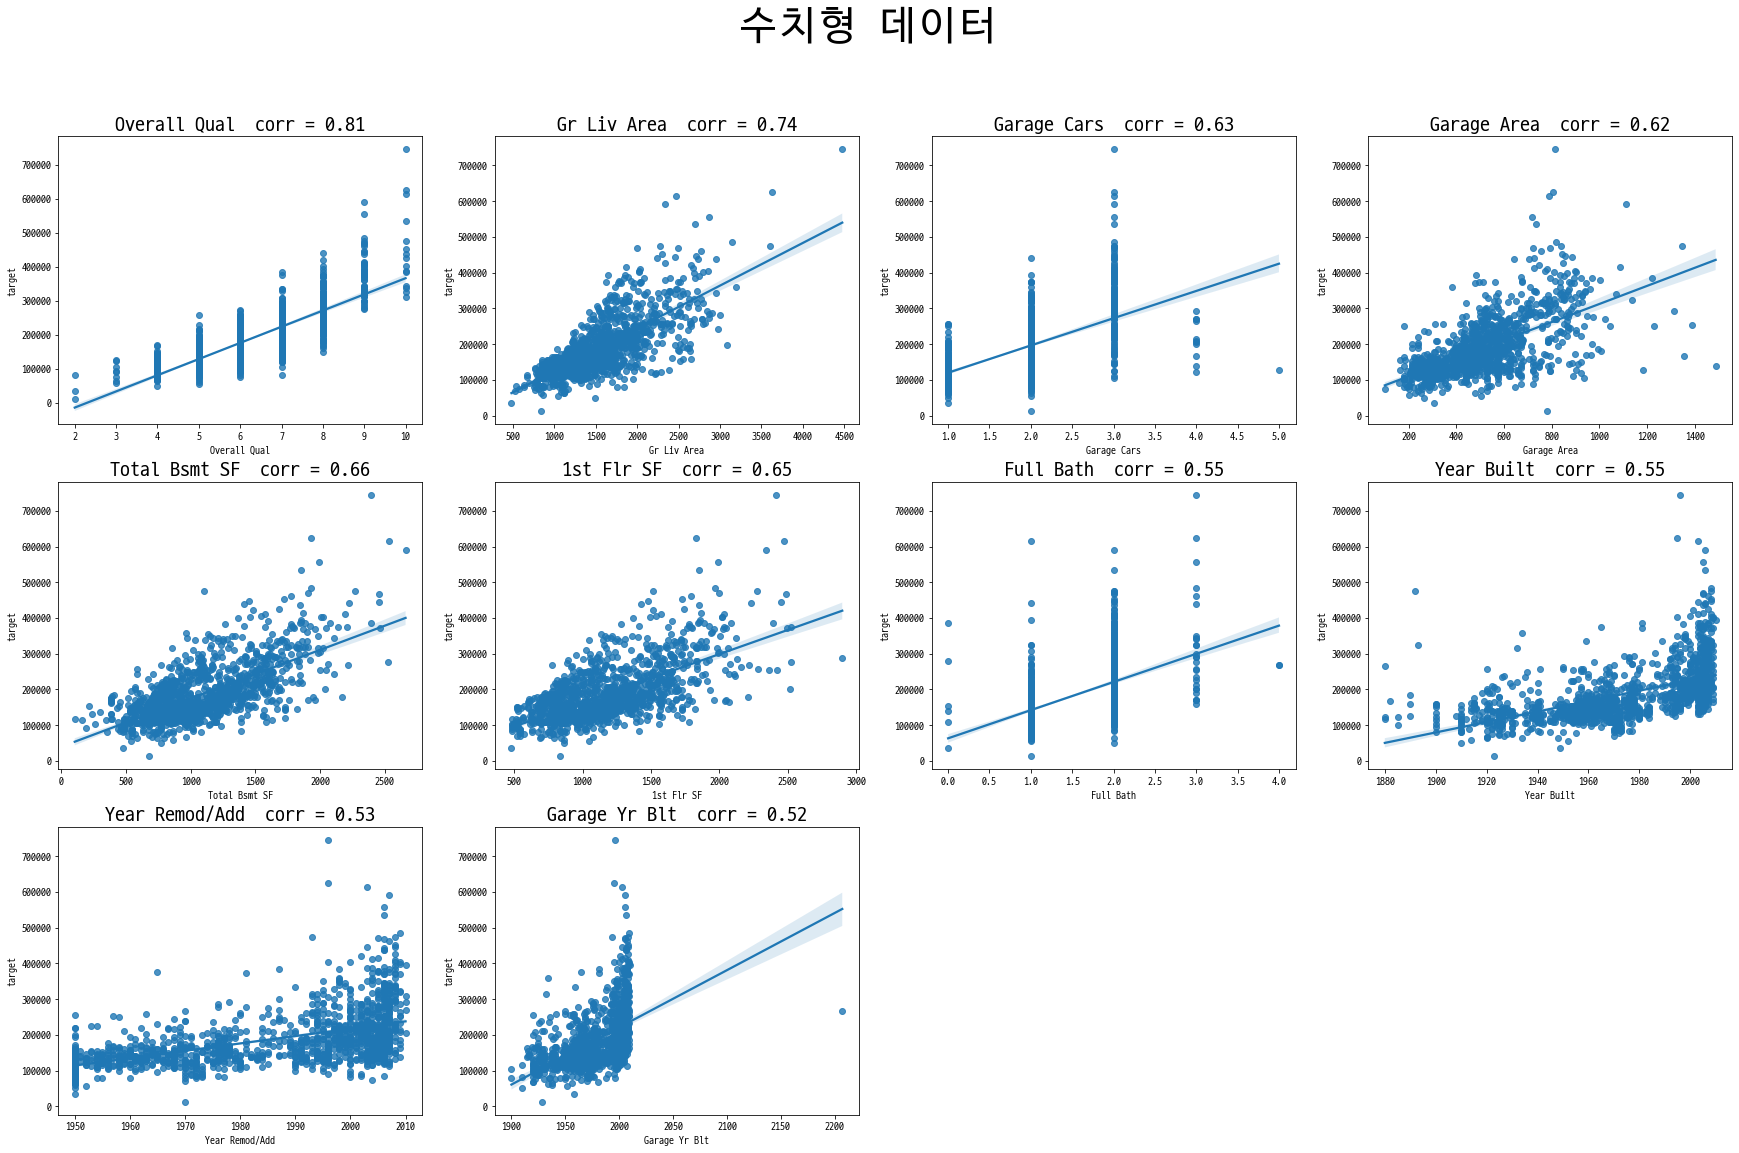

In [13]:
plt.figure(figsize=(30,18))
plt.suptitle("수치형 데이터", fontsize=40)

for idx, t in enumerate(feature_int, 1):
    ax = plt.subplot(3, 4, idx)
    plt.title(t + f"  corr = {df[[t, 'target']].corr().iloc[0,1].round(2)}", fontsize=20)
    sns.regplot(x = df[t], y = df['target'], ax = ax)
plt.show()

In [14]:
df[['Garage Cars', 'Garage Area']].corr()

,Garage Cars,Garage Area
Garage Cars,1.000000,0.840054
Garage Area,0.840054,1.000000


In [15]:
df['Garage Yr Blt'].sort_values(ascending = False)

id
255    2207
688    2010
512    2009
260    2009
266    2009
       ... 
66     1910
405    1910
874    1910
247    1900
897    1900
Name: Garage Yr Blt, Length: 1350, dtype: int64

분석
- Full bath : target과 무관
- Garage Cars : 특정시점(3대)까지는 비레하나, 이후에는 오히려 집값 감소
- Garage Area 는 Garage Cars와 상관도가 매우 높아(0.84) 둘 중 하나만 사용하는 것이 좋을 것이라고 생각됨
- Year Remod/Add : 1950 값이 지나치게 많음. 데이터 오염이 의심됨
- Garage Yr Blt : 2207년 값이 존재. 데이터 오류

In [16]:
# 중복값 처리
df = df.drop_duplicates()
print(len(df))
df.head()

1349


,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [17]:
# Year Remod/Add 1950이 너무 많은 문제
# 리모델링 연도가 불명일 경우 1950년으로 체크했을 가능성이 있음
# 리모델링 연도가 모두 건설 년도 이후이므로 데이터를 그대로 사용
df[df['Year Remod/Add'] < df['Year Built']]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,


In [18]:
df[df['Garage Yr Blt'] == 2207]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
255,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


In [19]:
df = df.drop(255) #254번 행을 삭제했습니다.
df.loc[250:260] 

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
id,,,,,,,,,,,,,,
250,6,1190,TA,2,430,Gd,1181,1190,Gd,2,1993,1993,1993,166000
251,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,306000
252,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,117000
253,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,119000
254,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,113000
256,5,1051,TA,1,264,TA,1051,1051,TA,1,1966,1966,1966,124400
257,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,220000
258,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,144000
259,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,200100


In [20]:
df.reset_index(inplace = True)
df.loc[250:260]

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
250,251,8,2340,Gd,3,787,Gd,1236,1236,Gd,2,1996,1996,1996,306000
251,252,4,875,TA,2,728,Gd,385,875,TA,1,1972,2006,1975,117000
252,253,5,988,TA,1,276,TA,876,988,TA,1,1950,1950,1950,119000
253,254,5,793,TA,1,240,Fa,793,793,TA,1,1945,1950,1945,113000
254,256,5,1051,TA,1,264,TA,1051,1051,TA,1,1966,1966,1966,124400
255,257,7,1958,Gd,2,499,Gd,779,1029,Gd,2,1994,2001,1994,220000
256,258,5,1211,TA,2,576,TA,864,1211,TA,1,1962,2002,1972,144000
257,259,7,1802,TA,1,216,TA,793,901,Fa,1,1920,1950,1920,200100
258,260,8,1836,Gd,2,517,Gd,1836,1836,Gd,2,2008,2009,2009,264500
259,261,6,1314,Gd,2,440,Gd,1314,1314,Gd,2,2006,2006,2006,176432


### 카테고리 데이터 

In [21]:
dic_four = {}
for x, y in zip(['Ex', 'Gd', 'TA', 'Fa'], [4,3,2,1]):
    dic_four[x] = y
df['Exter Qual encoded'] = df['Exter Qual'].map(dic_four)
df['Kitchen Qual encoded'] = df['Kitchen Qual'].map(dic_four)

In [22]:
dic_five = {}
for x, y in zip(['Ex', 'TA', 'Gd', 'Fa', 'Po'], [5,3,4,2,1]):
    dic_five[x] = y
df['Bsmt Qual Encoded'] = df['Bsmt Qual'].map(dic_five)

In [23]:
df.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual Encoded
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250,4,4,5
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000,3,3,5
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000,2,2,3
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000,2,3,3
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000,3,3,4


In [24]:
%pip install pycaret

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached pyod-0.9.7-py3-none-any.whl
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached wordcloud-1.8.1-cp39-cp39-win_amd64.whl
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
  Usin

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\user\anaconda3\envs\ox\python.exe' 'C:\Users\user\anaconda3\envs\ox\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\user\AppData\Local\Temp\tmp6rqw1au0'
       cwd: C:\Users\user\AppData\Local\Temp\pip-install-dam9leco\scikit-learn_1cc633e835e6403dbbf6cfff7d2ed32f
  Complete output (963 lines):
  Partial import of sklearn during the build process.
  C:\Users\user\AppData\Local\Temp\pip-build-env-_p3k4m8u\overlay\Lib\site-packages\setuptools\_distutils\_msvccompiler.py:528: UserWarning: Fallback spawn triggered. Please update distutils monkeypatch.
    warnings.warn(
  Compiling sklearn\__check_build\_check_build.pyx because it changed.
  Compiling sklearn\preprocessing\_csr_polynomial_expansion.pyx because it changed.
  Compiling sklearn\cluster\_dbscan_inner.pyx because it changed.
  Compiling sklearn\cluster\_hierarchical_fast.pyx because it changed.
  Compiling sklearn\cluste

  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Failed to build scikit-learn


  creating build\lib.win-amd64-3.9\sklearn\compose
  copying sklearn\compose\_column_transformer.py -> build\lib.win-amd64-3.9\sklearn\compose
  copying sklearn\compose\_target.py -> build\lib.win-amd64-3.9\sklearn\compose
  copying sklearn\compose\__init__.py -> build\lib.win-amd64-3.9\sklearn\compose
  creating build\lib.win-amd64-3.9\sklearn\compose\tests
  copying sklearn\compose\tests\test_column_transformer.py -> build\lib.win-amd64-3.9\sklearn\compose/tests
  copying sklearn\compose\tests\test_target.py -> build\lib.win-amd64-3.9\sklearn\compose/tests
  copying sklearn\compose\tests\__init__.py -> build\lib.win-amd64-3.9\sklearn\compose/tests
  creating build\lib.win-amd64-3.9\sklearn\covariance
  copying sklearn\covariance\elliptic_envelope.py -> build\lib.win-amd64-3.9\sklearn\covariance
  copying sklearn\covariance\empirical_covariance_.py -> build\lib.win-amd64-3.9\sklearn\covariance
  copying sklearn\covariance\graph_lasso_.py -> build\lib.win-amd64-3.9\sklearn\covariance
 

In [25]:
%pip install scikit-learn

  copying sklearn\feature_selection\_from_model.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  copying sklearn\feature_selection\_mutual_info.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  copying sklearn\feature_selection\_rfe.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  copying sklearn\feature_selection\_univariate_selection.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  copying sklearn\feature_selection\_variance_threshold.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  copying sklearn\feature_selection\__init__.py -> build\lib.win-amd64-3.9\sklearn\feature_selection
  creating build\lib.win-amd64-3.9\sklearn\feature_selection\tests
  copying sklearn\feature_selection\tests\test_base.py -> build\lib.win-amd64-3.9\sklearn\feature_selection/tests
  copying sklearn\feature_selection\tests\test_chi2.py -> build\lib.win-amd64-3.9\sklearn\feature_selection/tests
  copying sklearn\feature_selection\tests\test_feature_select.py -> buil

In [26]:
df.drop(feature_category,axis=1)
df.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,Exter Qual encoded,Kitchen Qual encoded,Bsmt Qual Encoded
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250,4,4,5
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000,3,3,5
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000,2,2,3
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000,2,3,3
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000,3,3,4


In [28]:
from pycaret.regression import *
reg = setup(data = train, target = 'target', normalize = True, session_id = 0 )

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
from sklearn.preprocessing import LabelEncoder

corr_df = df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
df.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [ ]:
ct = ColumnTransformer(
[("scaling", StandardScaler(), ['Overall Qual', 'Gr Liv Area', 'Garage Cars','Garage Area', 'Total Bsmt SF', '1st Flr SF',
                                'Full Bath', 'Year Built', 'Year Remod/Add','Garage Yr Blt']),
 ("onehot", OneHotEncoder(sparse = False), ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'])])

In [ ]:
# target을 제외한 모든 열을 추출(X)
features = df.drop("target", axis = 1)

# 데이터프레임과 target 분할
X_train, X_test, y_train, y_test = train_test_split(features, df['target'], random_state = 42)

# ColumnTransformer로 생성된 객체 적용
ct.fit(X_train)
X_train_t = ct.transform(X_train)

X_train_t

array([[-0.89819889, -0.59808326,  0.22235001, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.57981294,  0.46446047,  0.22235001, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57981294,  0.01654506,  0.22235001, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57981294, -0.760779  ,  0.22235001, ...,  0.        ,
         1.        ,  0.        ],
       [-0.89819889, -0.85518269, -1.32949974, ...,  0.        ,
         0.        ,  1.        ],
       [-2.37621072, -0.72060721, -1.32949974, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train_t, y_train)
X_test_t = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_t, y_test)))

ValueError: Found unknown categories ['Po'] in column 2 during transform

In [ ]:
print(X_train_t.shape)
print(X_test_t.shape)

(1012, 22)
(338, 22)


### GarageCars, GarageArea

In [ ]:
test = pd.DataFrame()
test['car'] = df['Garage Cars']
test['area/car'] = df.apply(lambda x : x['Garage Area'] / x['Garage Cars'], axis = 1)
test

,car,area/car
id,,
1,3,322.666667
2,2,233.000000
3,1,288.000000
4,2,288.000000
5,3,312.000000
...,...,...
1346,2,211.000000
1347,3,283.333333
1348,1,318.000000


<AxesSubplot:xlabel='Garage Cars', ylabel='Garage Area'>

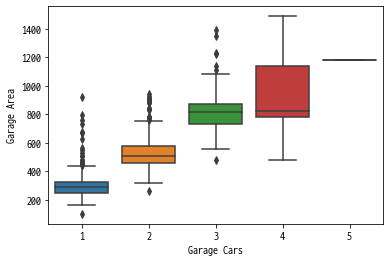

In [ ]:
sns.boxplot(x = df['Garage Cars'] , y = df['Garage Area'])

<AxesSubplot:xlabel='car', ylabel='area/car'>

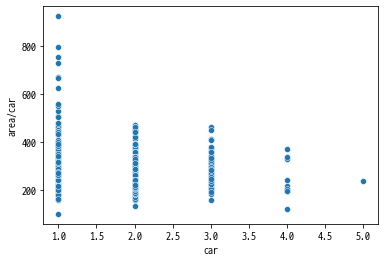

In [ ]:
sns.scatterplot(x = test['car'], y = test['area/car'])